In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
def load_df(fp):
    df = pd.read_csv(fp, names=['Function', 'Container', 'K', 'T', 'time_ns'], header=0)
    df['time_us'] = df.time_ns / 1000
    return df

In [4]:
HMMBase0_df = load_df('HMMBase/HMMBase_v0.0.14_1572527207_2019.csv')
HMMBase0_df.head()

,Function,Container,K,T,time_ns,time_us
0,rand,Array,2,10,3207.6,3.2076
1,rand,Array,2,10,3209.5,3.2095
2,rand,Array,2,10,3210.5,3.2105
3,rand,Array,2,10,3216.8,3.2168
4,rand,Array,2,10,3219.4,3.2194


In [5]:
HMMBase1_df = load_df('HMMBase/HMMBase_v1.0.0-beta1_1572952169_2019.csv')
HMMBase1_df.head()

,Function,Container,K,T,time_ns,time_us
0,rand,Array,2,10,2843.0,2.8430
1,rand,Array,2,10,2851.4,2.8514
2,rand,Array,2,10,2854.9,2.8549
3,rand,Array,2,10,2859.0,2.8590
4,rand,Array,2,10,2860.4,2.8604


In [6]:
def plot_time_vs_k(df, functions):
    # TODO: Default figure size
    # TODO: Display n_samples
    sns.lineplot(x='K', y='time_us', hue='Container', style='Function', data=df[(df['T'] == 1000) & (df['Function'].isin(functions))])
    plt.xticks(sorted(df.K.unique()));
    plt.ylabel('Time (µs)')

In [7]:
def plot_time_vs_T(df, functions):
    # TODO: Default figure size
    # TODO: Display n_samples
    sns.lineplot(x='T', y='time_us', hue='Container', style='Function', data=df[(df['K'] == 10) & (df['Function'].isin(functions))])
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(sorted(df['T'].unique()));
    plt.ylabel('Time (µs)')

/home/maxmouchet/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'HMMBase v1.0.0')

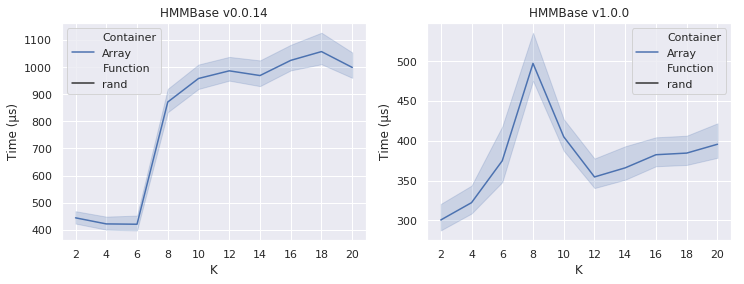

In [8]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase0_df, ['rand'])
plt.title('HMMBase v0.0.14')

plt.subplot('122')
plot_time_vs_k(HMMBase1_df, ['rand'])
plt.title('HMMBase v1.0.0')

Text(0.5, 1.0, 'HMMBase v1.0.0')

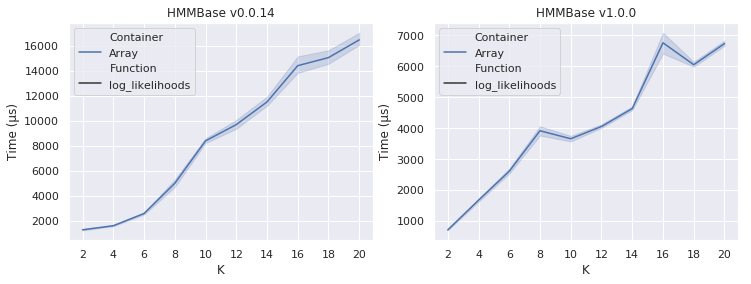

In [9]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase0_df, ['log_likelihoods'])
plt.title('HMMBase v0.0.14')

plt.subplot('122')
plot_time_vs_k(HMMBase1_df, ['log_likelihoods'])
plt.title('HMMBase v1.0.0')

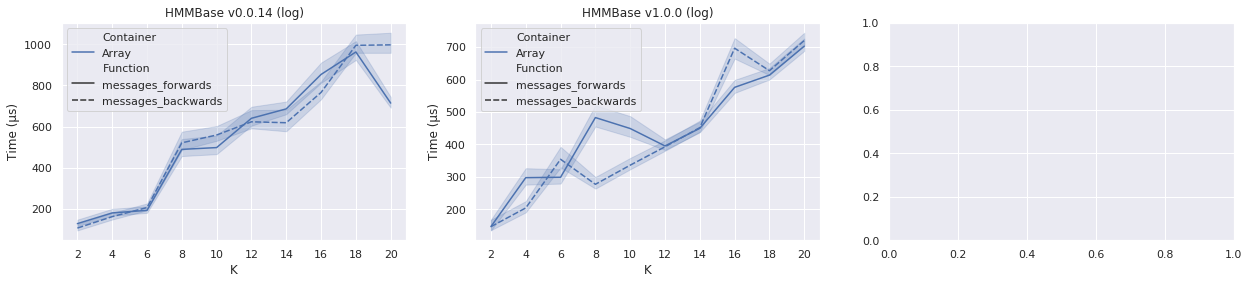

In [10]:
plt.figure(figsize=(21,4))

plt.subplot('131')
plot_time_vs_k(HMMBase0_df, ['messages_forwards', 'messages_backwards'])
plt.title('HMMBase v0.0.14 (log)')

plt.subplot('132')
plot_time_vs_k(HMMBase1_df, ['messages_forwards', 'messages_backwards'])
plt.title('HMMBase v1.0.0 (log)')

plt.subplot('133')
# plot_time_vs_k(HMMBase1_df, ['messages_forwards', 'messages_backwards'])
# plt.title('HMMBase v1.0.0')

Text(0.5, 1.0, 'HMMBase v1.0.0')

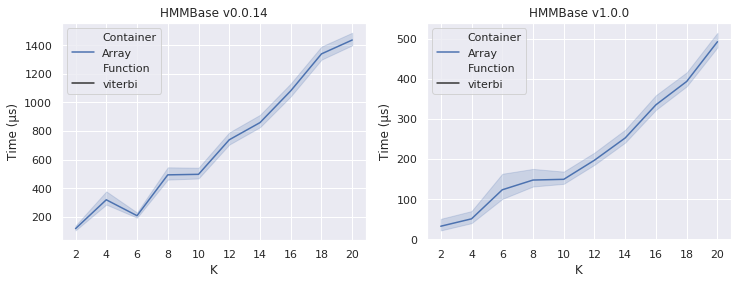

In [11]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase0_df, ['viterbi'])
plt.title('HMMBase v0.0.14')

plt.subplot('122')
plot_time_vs_k(HMMBase1_df, ['viterbi'])
plt.title('HMMBase v1.0.0')

Text(0.5, 1.0, 'HMMBase v1.0.0')

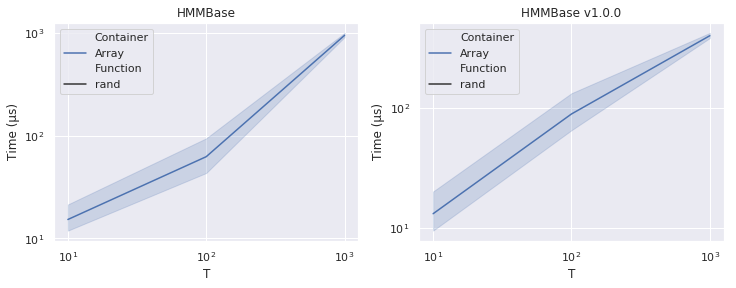

In [12]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase0_df, ['rand'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(HMMBase1_df, ['rand'])
plt.title('HMMBase v1.0.0')

Text(0.5, 1.0, 'HMMBase v1.0.0')

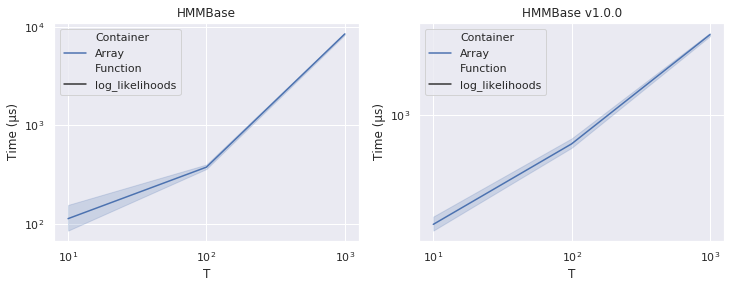

In [13]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase0_df, ['log_likelihoods'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(HMMBase1_df, ['log_likelihoods'])
plt.title('HMMBase v1.0.0')

Text(0.5, 1.0, 'HMMBase v1.0.0')

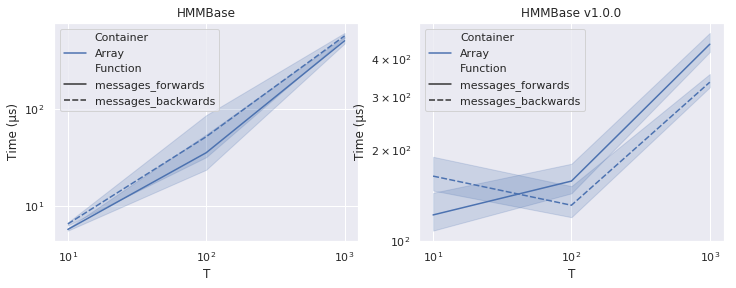

In [14]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase0_df, ['messages_forwards', 'messages_backwards'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(HMMBase1_df, ['messages_forwards', 'messages_backwards'])
plt.title('HMMBase v1.0.0')

Text(0.5, 1.0, 'HMMBase v1.0.0')

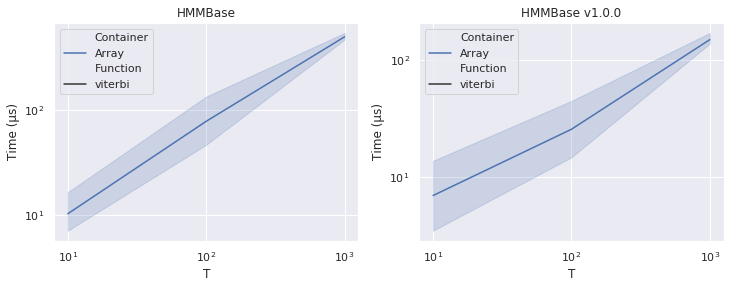

In [15]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase0_df, ['viterbi'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(HMMBase1_df, ['viterbi'])
plt.title('HMMBase v1.0.0')

### Summary

In [16]:
def get_median_time(df, function, container, K, T):
    return df[(df.Function == function) & (df.K == K) & (df['T'] == T) & (df.Container == container)].time_us.median()/1000

In [17]:
agg = []
agg.append(('Forward Pass', 'HMMBase v0.0.14', get_median_time(HMMBase0_df, 'messages_forwards', 'Array', 10, 1000)))
agg.append(('Forward Pass', 'HMMBase v1.0.0', get_median_time(HMMBase1_df, 'messages_forwards', 'Array', 10, 1000)))
agg.append(('Backward Pass', 'HMMBase v0.0.14', get_median_time(HMMBase0_df, 'messages_backwards', 'Array', 10, 1000)))
agg.append(('Backward Pass', 'HMMBase v1.0.0', get_median_time(HMMBase1_df, 'messages_backwards', 'Array', 10, 1000)))
agg.append(('Viterbi', 'HMMBase v0.0.14', get_median_time(HMMBase0_df, 'viterbi', 'Array', 10, 1000)))
agg.append(('Viterbi', 'HMMBase v1.0.0', get_median_time(HMMBase1_df, 'viterbi', 'Array', 10, 1000)))
agg.append(('Likelihood', 'HMMBase v0.0.14', get_median_time(HMMBase0_df, 'log_likelihoods', 'Array', 10, 1000)))
agg.append(('Likelihood', 'HMMBase v1.0.0', get_median_time(HMMBase1_df, 'log_likelihoods', 'Array', 10, 1000)))
agg_df = pd.DataFrame.from_records(agg, columns=['Function', 'Implementation', 'time_us'])

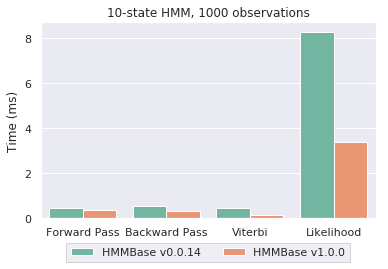

In [18]:
sns.barplot(x='Function', y='time_us', hue='Implementation', data=agg_df, palette='Set2')
plt.xlabel('')
plt.ylabel('Time (ms)')
plt.title('10-state HMM, 1000 observations')

# https://stackoverflow.com/a/4701285
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=False, shadow=False, ncol=3)

plt.savefig('benchmark_summary.png', dpi=300)

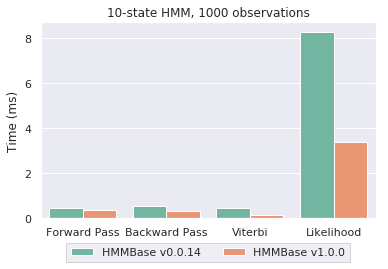

In [19]:
sns.barplot(x='Function', y='time_us', hue='Implementation', data=agg_df, palette='Set2')
plt.xlabel('')
plt.ylabel('Time (ms)')
plt.title('10-state HMM, 1000 observations')

# https://stackoverflow.com/a/4701285
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=False, shadow=False, ncol=3)

plt.savefig('benchmark_summary.png', dpi=300)